In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import cell2location
import scvi
from scipy.io import mmread
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs

Global seed set to 0


In [2]:
results_folder = '../results/analysis/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures_liver'
run_name = f'{results_folder}/cell2location_map_liver'

In [3]:
slide_name='HCC-1L'
adata_file = f"{run_name}/{slide_name}.h5ad"
adata_vis = sc.read_h5ad(adata_file)
# mod = cell2location.models.Cell2location.load(f"{new_run_name}", adata_vis)

In [4]:
adata_vis.obsm

AxisArrays with keys: means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf

In [5]:
adata_vis.obsm['q05_cell_abundance_w_sf']

q05cell_abundance_w_sf_ASC  q05cell_abundance_w_sf_B  \
AAACAAGTATCTCCCA-1                    0.312997                  0.029713   
AAACACCAATAACTGC-1                    6.651161                  1.063509   
AAACAGCTTTCAGAAG-1                    5.619727                  1.492868   
AAACAGGGTCTATATT-1                    4.253527                  0.843937   
AAACATGGTGAGAGGA-1                    4.825398                  0.911051   
...                                        ...                       ...   
TTGTTCTAGATACGCT-1                    2.533729                  0.403380   
TTGTTGTGTGTCAAGA-1                    0.308650                  0.056011   
TTGTTTCACATCCAGG-1                    1.636665                  0.269394   
TTGTTTCATTAGTCTA-1                    2.054546                  0.260408   
TTGTTTCCATACAACT-1                    4.859351                  1.141676   

                    q05cell_abundance_w_sf_CD4+ T  \
AAACAAGTATCTCCCA-1                       0.080701   
AAACACCAATAACTGC-1                       0.195923   
AAACAGCTTTCAGAAG-1                       0.228275   
AAACAGGGTCTATATT-1                       0.210317   
AAACATGGTGAGAGGA-1                       0.200735   
...                                           ...   
TTGTTCTAGATACGCT-1                       0.086129   
TTGTTGTGTGTCAAGA-1                       0.043379   
TTGTTTCACATCCAGG-1                       0.117455   
TTGTTTCATTAGTCTA-1                       0.062032   
TTGTTTCCATACAACT-1                       0.159177   

                    q05cell_abundance_w_sf_CD8+ T  \
AAACAAGTATCTCCCA-1                       0.080107   
AAACACCAATAACTGC-1                       0.081110   
AAACAGCTTTCAGAAG-1                       0.092770   
AAACAGGGTCTATATT-1                       0.105345   
AAACATGGTGAGAGGA-1                       0.097709   
...                                           ...   
TTGTTCTAGATACGCT-1                       0.066020   
TTGTTGTGTGTCAAGA-1                       0.050716   
TTGTTTCACATCCAGG-1                       0.109197   
TTGTTTCATTAGTCTA-1                       0.058715   
TTGTTTCCATACAACT-1                       0.073929   

                    q05cell_abundance_w_sf_Dendritic  \
AAACAAGTATCTCCCA-1                          0.056138   
AAACACCAATAACTGC-1                          0.086337   
AAACAGCTTTCAGAAG-1                          0.298757   
AAACAGGGTCTATATT-1                          0.131763   
AAACATGGTGAGAGGA-1                          0.394160   
...                                              ...   
TTGTTCTAGATACGCT-1                          0.274441   
TTGTTGTGTGTCAAGA-1                          0.007715   
TTGTTTCACATCCAGG-1                          0.075459   
TTGTTTCATTAGTCTA-1                          0.130454   
TTGTTTCCATACAACT-1                          0.235800   

                    q05cell_abundance_w_sf_Endothelial  \
AAACAAGTATCTCCCA-1                            0.883729   
AAACACCAATAACTGC-1                            0.496673   
AAACAGCTTTCAGAAG-1                            0.554406   
AAACAGGGTCTATATT-1                            0.602263   
AAACATGGTGAGAGGA-1                            0.758360   
...                                                ...   
TTGTTCTAGATACGCT-1                            0.214832   
TTGTTGTGTGTCAAGA-1                            0.550319   
TTGTTTCACATCCAGG-1                            0.288561   
TTGTTTCATTAGTCTA-1                            0.868790   
TTGTTTCCATACAACT-1                            0.416253   

                    q05cell_abundance_w_sf_Epithelial  \
AAACAAGTATCTCCCA-1                           3.500511   
AAACACCAATAACTGC-1                          23.084259   
AAACAGCTTTCAGAAG-1                          20.706973   
AAACAGGGTCTATATT-1                          18.315301   
AAACATGGTGAGAGGA-1                          19.613011   
...                                               ...   
TTGTTCTAGATACGCT-1                           9.218917   
TTGTTGT

In [6]:
# compute KNN using the cell2location output stored in adata.obsm
sc.pp.neighbors(adata_vis, use_rep='q05_cell_abundance_w_sf',
                n_neighbors = 15)

# Cluster spots into regions using scanpy
sc.tl.leiden(adata_vis, resolution=0.2)

# add region as categorical variable
adata_vis.obs["region_cluster"] = adata_vis.obs["leiden"].astype("category")

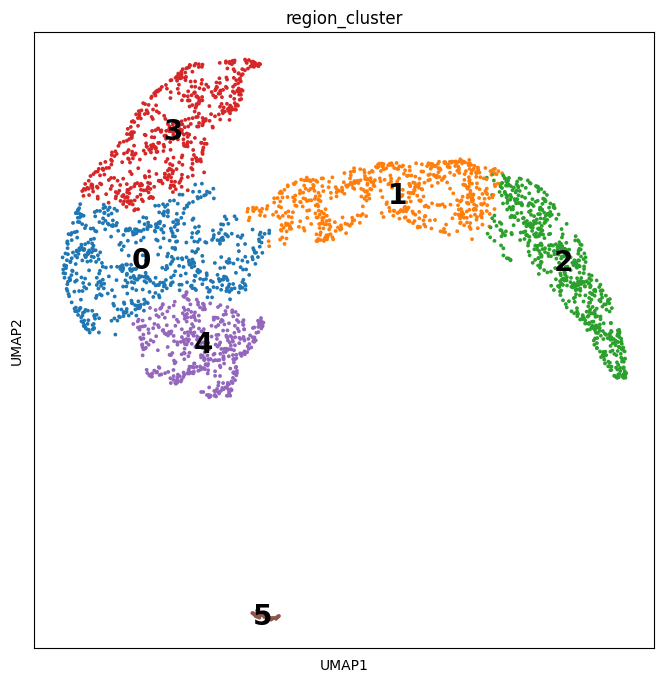

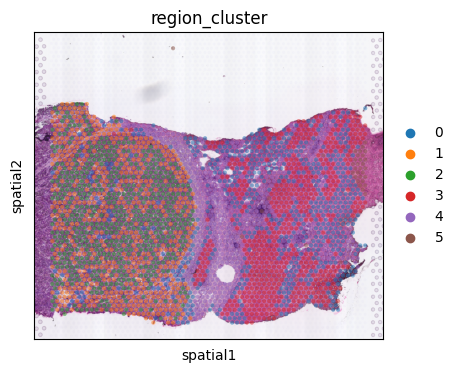

In [7]:
# compute UMAP using KNN graph based on the cell2location output
sc.tl.umap(adata_vis, min_dist = 0.3, spread = 1)

# show regions in UMAP coordinates
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [8, 8]}):
    sc.pl.umap(adata_vis, color=['region_cluster'], size=30,
               color_map = 'RdPu', ncols = 2, legend_loc='on data',
               legend_fontsize=20)
#     sc.pl.umap(adata_vis, color=['sample'], size=30,
#                color_map = 'RdPu', ncols = 2,
#                legend_fontsize=20)

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    sc.pl.spatial(adata_vis, color=['region_cluster'], 
                  size=1.3, img_key='hires', alpha=0.5)

In [8]:
adata_vis.obs["region_cluster"]

AAACAAGTATCTCCCA-1    4
AAACACCAATAACTGC-1    2
AAACAGCTTTCAGAAG-1    2
AAACAGGGTCTATATT-1    2
AAACATGGTGAGAGGA-1    2
                     ..
TTGTTCTAGATACGCT-1    1
TTGTTGTGTGTCAAGA-1    0
TTGTTTCACATCCAGG-1    1
TTGTTTCATTAGTCTA-1    1
TTGTTTCCATACAACT-1    2
Name: region_cluster, Length: 2791, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [9]:
name=list(adata_vis.uns['spatial'].keys())[0]

In [10]:
adata_vis

AnnData object with n_obs × n_vars = 2791 × 16365
    obs: 'in_tissue', 'array_row', 'array_col', '_indices', '_scvi_batch', '_scvi_labels', 'leiden', 'region_cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'spatial', 'neighbors', 'leiden', 'umap', 'region_cluster_colors'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'X_umap'
    obsp: 'distances', 'connectivities'

In [11]:
adata_vis.obs['sample']=name

In [12]:
types=['ASC',
 'B',
 'CD4+ T',
 'CD8+ T',
 'Dendritic',
 'Endothelial',
 'Epithelial',
 'Fibroblast',
 'ILC',
 'MAIT',
 'MZB',
 'Macrophage',
 'Mast',
 'Mature B',
 'Memory B',
 'Mono',
 'NK',
 'NKT',
 'Naive B',
 'Plasma B',
 'Treg']

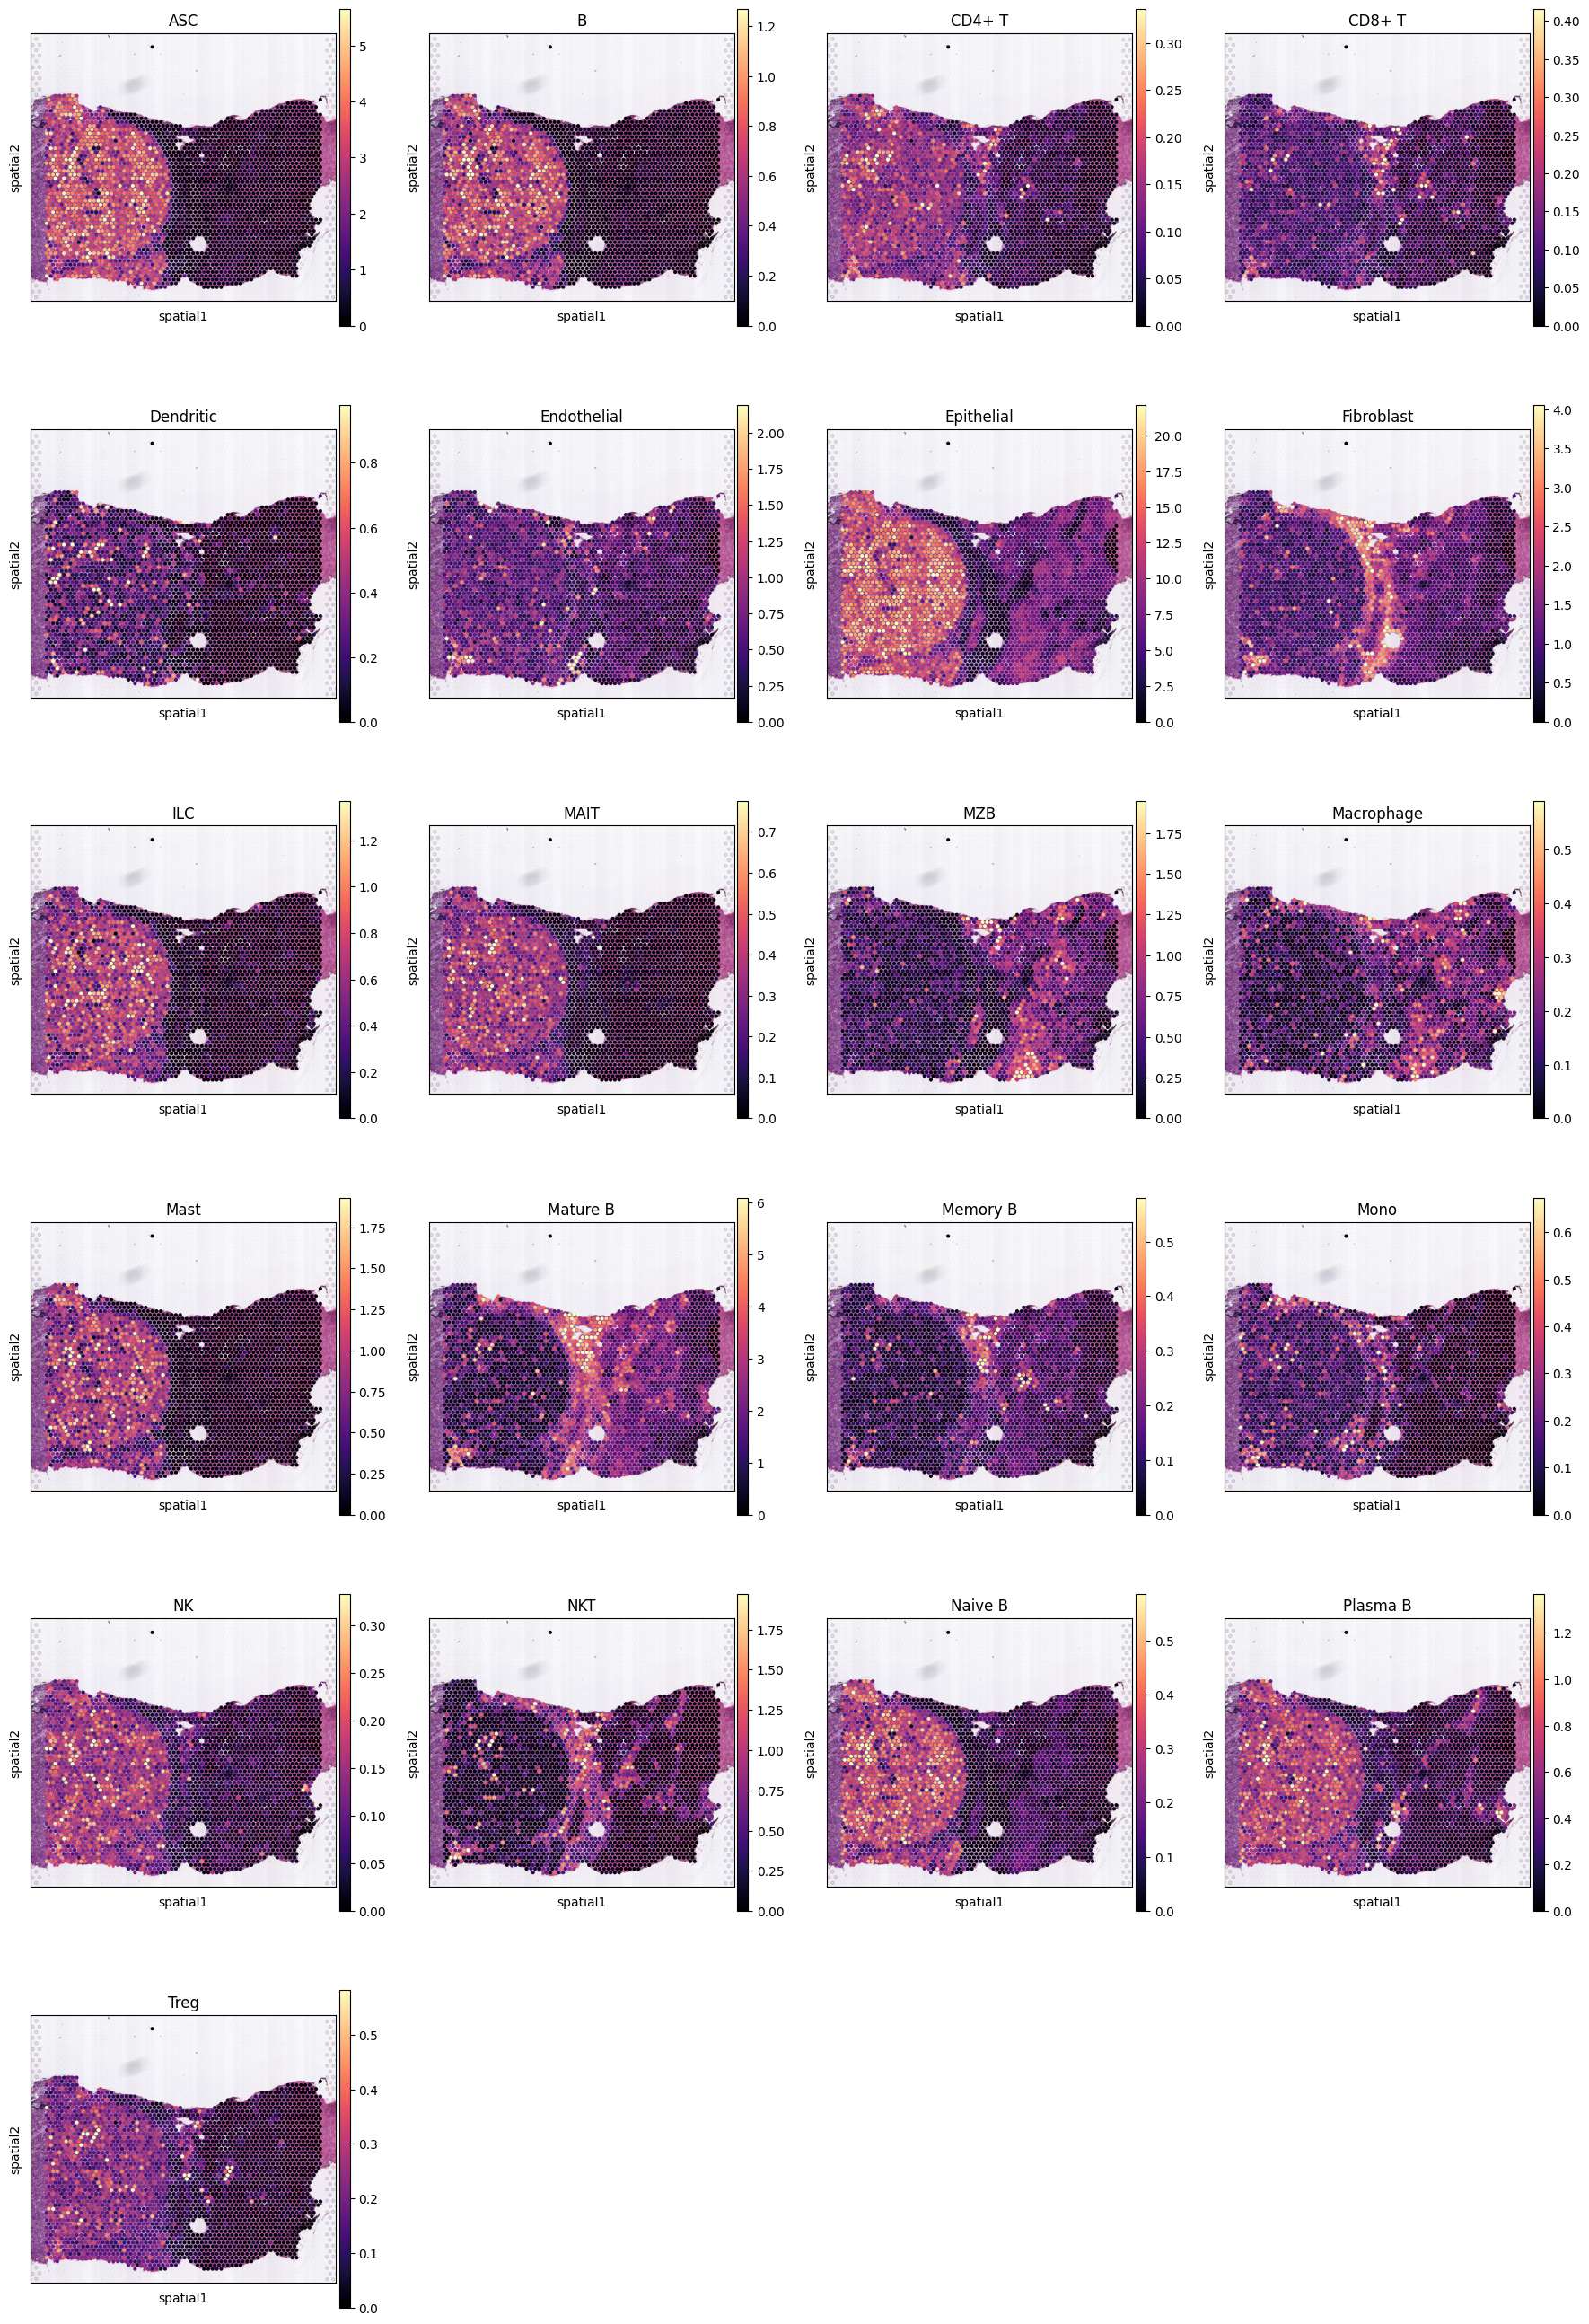

In [13]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present', 
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, name)
    
# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    
    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=types, 
                  ncols=4, size=1.3, 
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',
                  save=f'cell2loc_{slide_name}.png'
                 )
plt.show()

# Cells of each cluster

In [30]:
spot2cell_q05_class0=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='0')]
spot2cell_q05_class1=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='1')]
spot2cell_q05_class2=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='2')]
spot2cell_q05_class3=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='3')]
spot2cell_q05_class4=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='4')]
spot2cell_q05_class5=adata_vis.obsm['q05_cell_abundance_w_sf'][np.array(adata_vis.obs["region_cluster"]=='5')]
spot2cell=[spot2cell_q05_class0,spot2cell_q05_class1,spot2cell_q05_class2,spot2cell_q05_class3,spot2cell_q05_class4,spot2cell_q05_class5]

In [31]:
spot2cell_q05_class0.columns

Index(['q05cell_abundance_w_sf_ASC', 'q05cell_abundance_w_sf_B',
       'q05cell_abundance_w_sf_CD4+ T', 'q05cell_abundance_w_sf_CD8+ T',
       'q05cell_abundance_w_sf_Dendritic',
       'q05cell_abundance_w_sf_Endothelial',
       'q05cell_abundance_w_sf_Epithelial',
       'q05cell_abundance_w_sf_Fibroblast', 'q05cell_abundance_w_sf_ILC',
       'q05cell_abundance_w_sf_MAIT', 'q05cell_abundance_w_sf_MZB',
       'q05cell_abundance_w_sf_Macrophage', 'q05cell_abundance_w_sf_Mast',
       'q05cell_abundance_w_sf_Mature B', 'q05cell_abundance_w_sf_Memory B',
       'q05cell_abundance_w_sf_Mono', 'q05cell_abundance_w_sf_NK',
       'q05cell_abundance_w_sf_NKT', 'q05cell_abundance_w_sf_Naive B',
       'q05cell_abundance_w_sf_Plasma B', 'q05cell_abundance_w_sf_Treg'],
      dtype='object')

In [32]:
spot2cell_q05_class0.columns=types
spot2cell_q05_class1.columns=types
spot2cell_q05_class2.columns=types
spot2cell_q05_class3.columns=types
spot2cell_q05_class4.columns=types
spot2cell_q05_class5.columns=types

In [33]:
spot2cell_q05_class0.columns

Index(['ASC', 'B', 'CD4+ T', 'CD8+ T', 'Dendritic', 'Endothelial',
       'Epithelial', 'Fibroblast', 'ILC', 'MAIT', 'MZB', 'Macrophage', 'Mast',
       'Mature B', 'Memory B', 'Mono', 'NK', 'NKT', 'Naive B', 'Plasma B',
       'Treg'],
      dtype='object')

In [34]:
# for i in range(4):
#     spot2cell[i].to_csv('spot2cell_q05_class_4_'+str(i)+'.csv')

In [40]:
npclass0=np.array(spot2cell_q05_class0)
npclass1=np.array(spot2cell_q05_class1)
npclass2=np.array(spot2cell_q05_class2)
npclass3=np.array(spot2cell_q05_class3)
npclass4=np.array(spot2cell_q05_class4)
npclass5=np.array(spot2cell_q05_class5)

In [38]:
np.arange(0,21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [42]:
npmean0=np.mean(npclass0,axis=0)
npmean1=np.mean(npclass1,axis=0)
npmean2=np.mean(npclass2,axis=0)
npmean3=np.mean(npclass3,axis=0)

In [45]:
npmean0

array([0.31433808, 0.04904057, 0.05243098, 0.06836304, 0.09184759,
       0.45860532, 4.75602076, 1.07822231, 0.07349776, 0.04911965,
       0.42741002, 0.16164158, 0.06752038, 1.99980843, 0.1154691 ,
       0.09416923, 0.03833186, 0.36155648, 0.05183443, 0.16839624,
       0.0599334 ])

In [47]:
x=np.arange(0,21)
cells=[[],[],[],[]]
fig = plt.figure(figsize=(8,6), dpi=140)
ax1 = plt.subplot(2, 2, 1)
ax1.plot(x,npmean0,'o',markersize=3)
ax2 = plt.subplot(2, 2, 2)
ax2.plot(x,npmean1,'o',markersize=3)
ax3 = plt.subplot(2, 2, 3)
ax3.plot(x,npmean2,'o',markersize=3)
ax4 = plt.subplot(2, 2, 4)
ax4.plot(x,npmean3,'o',markersize=3)
for i in range(len(npmean0)):
    if npmean0[i]>=0.1:
        ax1.text(i,npmean0[i],types[i],size=5)
        cells[0].append(type[i])
for i in range(len(npmean0)):
    if npmean1[i]>=0.1:
        ax2.text(i,npmean1[i],types[i],size=5)
        cells[1].append(type[i])
for i in range(len(npmean0)):
    if npmean2[i]>=0.1:
        ax3.text(i,npmean2[i],types[i],size=5)
        cells[2].append(type[i])
for i in range(len(npmean0)):
    if npmean3[i]>=0.1:
        ax4.text(i,npmean3[i],types[i],size=5)
        cells[3].append(type[i])
